<h2> Credit Default Prediction</h2>

<b>Problem Explained</b>

While working with Credit One they have asked us to analyze their customers who have been defaulting on loan payments. They have been realizing that over the years more customers have been defaulting and they want to understand if we can find any patterns in order to find a way to reduce the defaults and reduce the risk of losing business.

On this first part we will be analysing the data to understand what we have in hands. Understanding the customer is fundamental to understand why they default. 

Our data is a dataframe with 30,000 customers with defaulted payments in Taiwan with information which includes: 
Gender, education, marital status, amount of credit given, history of past payments, amount of bill statement and amount of previous payment. 

On this second part we will focus on build predictive models to better classify potential risk customers. 

We have already went through the Exploratory Data Analysis on part I that you can find <a href="https://github.com/ffmc/data-analytics-portfolio/blob/master/Credit%20Default%20Rate%20Analysis/Credit%20Default%20Rate%20Analysis.ipynb">here</a>. 

In [109]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
#Cross validation 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [110]:
library("IRdisplay")

NameError: name 'library' is not defined

We will be using the data set that we have already worked on and cleaned on part I, baptized as new_credit

In [4]:
new_credit = pd.read_csv('new_credit.csv')
new_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,1,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,1,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,2,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,3,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


We will start building our models and since we are seeking for a YES or NO result, we will be working with Classification problems. 
We are going to select all features as inddependent variables and DEFAULT as dependent variable since it´s the one we need to predict. 
The function train_test_split is used to randomly split trainning and testing datasets and we will be building the following models:
- Random Forest
- Gradient Boosting
- Supportive Vector Machine

In [7]:
#Selecting the independent variables
features= new_credit.iloc[:,0:23]

In [8]:
#Selecting dependent variable
depVar = new_credit['DEFAULT']

In [9]:
#Establish train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.25)

In [10]:
#Use the shape function to double check that the split was made as needed:
X_train.shape, X_test.shape

((22500, 23), (7500, 23))

In [43]:
#Name the Models
modelRF = RandomForestClassifier()
modelSVM = SVC()
modelGB = GradientBoostingClassifier()

Random Forest

In [52]:
#Fit the model
modelRF.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
#Check the accuracy
modelRF.score(X_train, y_train)

0.9784444444444444

This result indicates an overfitting, let's use cross validation. 

In [29]:
#Using Cross Validation
print(cross_val_score(modelRF, X_train, y_train))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79933333 0.80453333 0.80746667]


Supportive Vector Machine

In [45]:
#Fit the model
modelSVM.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
#Check the accuracy
modelSVM.score(X_train, y_train)

0.9901777777777778

This result indicates an overfitting, let's use cross validation. 

In [47]:
#Using Cross Validation
print(cross_val_score(modelSVM, X_train, y_train))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for un

[0.77893333 0.77773333 0.77946667]


Gradient Boosting Classifier 

In [48]:
#Fit the model
modelGB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
#Check the accuracy
modelGB.score(X_train, y_train)

0.8265333333333333

<b>Test and Evaluate the models, checking accuracy</b>

Random Forest 

In [88]:
from sklearn import metrics
modelRF_cv = RF_cv.fit(X_train, y_train)
predictions_RF_cv = cross_val_predict(modelRF_cv, X_test, y_test, cv=3)
print(metrics.accuracy_score(y_test, predictions_RF_cv))

0.8081333333333334


In [100]:
reportRF = classification_report(y_test, predictions_RF_cv)
print(reportRF)

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5859
           1       0.61      0.35      0.45      1641

    accuracy                           0.81      7500
   macro avg       0.72      0.64      0.66      7500
weighted avg       0.79      0.81      0.79      7500



SVM

In [97]:
SVM_cv = SVC()
modelSVM_cv = SVM_cv.fit(X_train, y_train)
predictions_SVM_cv = cross_val_predict(modelSVM_cv, X_test, y_test, cv=3)
print(metrics.accuracy_score(y_test, predictions_SVM_cv))

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

0.7837333333333333


In [101]:
reportSVM = classification_report(y_test, predictions_SVM_cv)
print(reportSVM)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5859
           1       0.68      0.02      0.04      1641

    accuracy                           0.78      7500
   macro avg       0.73      0.51      0.46      7500
weighted avg       0.76      0.78      0.70      7500



Gradient Boost

In [96]:
GB_cv = modelGB = GradientBoostingClassifier()
modelGB_cv = GB_cv.fit(X_train, y_train)
predictions_GB_cv = cross_val_predict(modelGB_cv, X_test, y_test, cv=3)
print(metrics.accuracy_score(y_test, predictions_GB_cv))

0.8184


In [102]:
reportGB = classification_report(y_test, predictions_GB_cv)
print(reportGB)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5859
           1       0.65      0.36      0.47      1641

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



As we can see by analysing the graph below, Random Forest and Gradient boost have a similar combination of Accuray and F1, so both can be a valid model to detect the the clients that are more likely to default on their credits. 

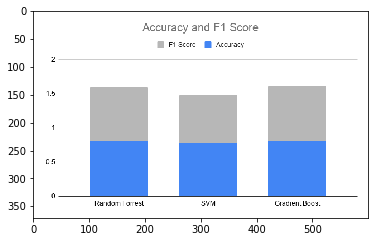

In [119]:
import matplotlib.image as mpimg
img=mpimg.imread('Accuracy and F1 Score.png')
imgplot = plt.imshow(img)